# Load and Preprocess Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import mode

# Load the first dataset and preprocess it

def load_preprocess_dataset_tcc():
    # Load the data
    dataframe = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

    # Impute missing values in TotalCharges column

    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    dataframe['TotalCharges'].replace(' ', np.nan, inplace=True)
    dataframe['TotalCharges'] = imputer.fit_transform(dataframe['TotalCharges'].values.reshape(-1, 1))

    # CustomerID drop

    dataframe.drop('customerID', axis=1, inplace=True)
    
    # Remove duplicates if any
    dataframe.drop_duplicates(inplace=True)

    # Replace 'No phone service' with 'No' in MultipleLines column
    dataframe['MultipleLines'].replace('No phone service', 'No', inplace=True)

    # Replace 'No internet service' with 'No' in 6 columns
    columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in columns:
        dataframe[col].replace('No internet service', 'No', inplace=True)


    # Encoding categorical columns and then dividing the dataset into training and testing sets 

    features = dataframe.drop('Churn', axis=1)
    target = dataframe['Churn']

    encoder = LabelEncoder()
    target = encoder.fit_transform(target)

    # One hot encoding of categorical columns

    features = pd.get_dummies(features, columns=['PaymentMethod', 'Contract', 'InternetService']) # More than 2 values
    features = pd.get_dummies(features, drop_first=True).astype('float64') # Binary columns

    # Scaling the features

    scaler = StandardScaler()
    columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
    features[columns] = scaler.fit_transform(features[columns])

    # Convert to dataframe both features and target
    features = pd.DataFrame(features)
    target = pd.DataFrame(target)


    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # print(type(X_train), type(X_test), type(y_train), type(y_test))

    return X_train, X_test, y_train, y_test

    

# Adult dataset

In [2]:
def load_preprocess_dataset_adult():
    columns = columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
    ]

    # Load the data
    dataframe = pd.read_csv('adult.data', names=columns)
    dataframe_test = pd.read_csv('adult.test', names=columns)
    # Remove the first row
    dataframe_test = dataframe_test.iloc[1:]
    
    # Remove duplicates if any
    dataframe.drop_duplicates(inplace=True)
    dataframe_test.drop_duplicates(inplace=True)

    features_categorical = dataframe.select_dtypes(include=['object'])
    features_numerical = dataframe.select_dtypes(include=['int64', 'float64'])

    # Replace `?` with mode 
    for col in features_categorical.columns.to_list():
        dataframe[col] = dataframe[col].replace(' ?', dataframe[col].mode()[0])
        dataframe_test[col] = dataframe_test[col].replace(' ?', dataframe_test[col].mode()[0])

    dataframe_test['age'] = dataframe_test['age'].astype('float64')

    X_train = dataframe.drop(columns='income', axis=1)
    X_test = dataframe_test.drop(columns='income', axis=1)

    y_train = dataframe['income']
    y_test = dataframe_test['income']

    # Encoding categorical columns 
    X_train = pd.get_dummies(X_train, columns=['sex'], drop_first=True)
    X_test = pd.get_dummies(X_test, columns=['sex'], drop_first=True)

    features_categorical.drop(['sex', 'income'], axis=1, inplace=True)

    X_train = pd.get_dummies(X_train, columns=features_categorical.columns.to_list()).astype('int64')
    X_test = pd.get_dummies(X_test, columns=features_categorical.columns.to_list()).astype('int64')

    y_train = pd.get_dummies(y_train, drop_first=True)
    y_test = pd.get_dummies(y_test, drop_first=True)

    # Adjust columns in test set
    X_test['native-country_ Holand-Netherlands'] = 0

    # Scaling 
    scaler = StandardScaler()
    X_train[features_numerical.columns.to_list()] = scaler.fit_transform(X_train[features_numerical.columns.to_list()])
    X_test[features_numerical.columns.to_list()] = scaler.transform(X_test[features_numerical.columns.to_list()])

    # print(type(X_train), type(X_test), type(y_train), type(y_test))

    return X_train, X_test, y_train, y_test


# Credit card dataset 

In [3]:
def load_preprocess_dataset_ccf():
    # Load the data
    dataframe = pd.read_csv('creditcard.csv')
    
    # Remove duplicates if any
    dataframe.drop_duplicates(inplace=True)

    # Separate positive and negative samples
    positive_samples = dataframe[dataframe['Class'] == 1]
    negative_samples = dataframe[dataframe['Class'] == 0]

    # Randomly select 20,000 negative samples
    negative_sample_subset = negative_samples.sample(n=20000, random_state=42)

    # Concatenate positive samples and the randomly selected negative samples
    subset_dataframe = pd.concat([positive_samples, negative_sample_subset])

    # Separate features and target
    features = subset_dataframe.drop('Class', axis=1)
    target = subset_dataframe['Class'].astype('float64')

    # Scaling the features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Convert to DataFrame both features and target
    features = pd.DataFrame(features)
    target = pd.DataFrame(target)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


# X_train, X_test, y_train, y_test = load_preprocess_dataset_ccf()
# print(type(X_train), type(X_test), type(y_train), type(y_test))


# Online 

In [14]:
def load_preprocess_dataset_online():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    # load the dataset
    df= pd.read_csv('concentric_dataset.csv')
    # print(df)

    # Check for missing values
    missing_values = df.isnull().sum()
    print(missing_values)

    # Impute missing values
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    df['X1'] = imputer.fit_transform(df['X1'].values.reshape(-1, 1))
    df['X2'] = imputer.fit_transform(df['X2'].values.reshape(-1, 1))

    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(duplicates)

    # Remove duplicates
    df.drop_duplicates(inplace=True)


    X = df[['X1', 'X2']].values
    y = df['y'].values


    # Scaling the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Convert to DataFrame both features and target
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Plot the dataset (optional for visualization)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.6)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.6)
    plt.legend()
    plt.show()

    return X_train, X_test, y_train, y_test

X1    0
X2    0
y     0
dtype: int64
0


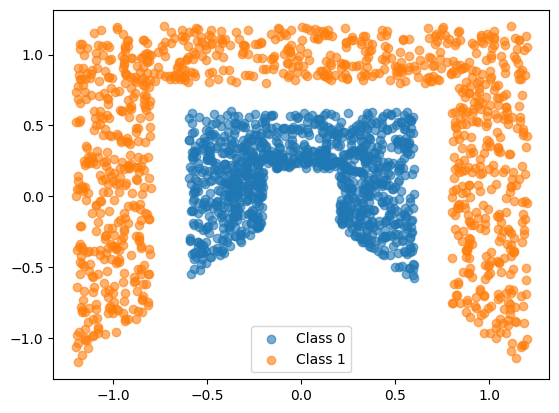

(array([[ 0.55352641,  0.49523806],
        [-0.23478821, -0.22507988],
        [ 1.17572692,  0.71500724],
        ...,
        [-0.38530788, -0.22944603],
        [ 0.21130831,  0.94261381],
        [-0.11995509,  0.30049423]]),
 array([[ 5.53703393e-02,  5.75990335e-01],
        [ 9.13391738e-01,  6.19408942e-01],
        [ 8.83807757e-01, -5.39547806e-01],
        [ 4.56434765e-01,  1.16931305e+00],
        [-1.13748485e+00,  3.40806157e-01],
        [-9.37165391e-01, -8.79842329e-01],
        [ 5.47455116e-01,  5.73476578e-01],
        [-1.02934628e+00, -7.12621543e-01],
        [ 9.80325865e-01,  3.56782741e-01],
        [ 8.48760377e-02,  8.53480407e-01],
        [-4.77157384e-01,  2.47687560e-01],
        [ 2.30645394e-01, -1.03426139e-01],
        [ 1.25708626e-01,  3.29468890e-01],
        [ 3.55620912e-01,  2.54582031e-01],
        [ 4.28760705e-01,  5.11043338e-01],
        [-9.29128189e-01,  4.10122173e-01],
        [-5.70310621e-01, -1.70603937e-02],
        [-9.04373099e

In [19]:
load_preprocess_dataset_online()

# Logistic Regression 

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, lambda_=0.01, tolerance=1e-6, iters=10000, regularizer='l2'):
        """
        Initialize the logistic regression model.
        
        Parameters:
        learning_rate -- learning rate for gradient descent (default=0.01)
        lambda_ -- regularization strength (default=0.01)
        tolerance -- tolerance for early stopping (default=1e-6)
        iters -- maximum number of iterations (default=10000)
        regularizer -- type of regularization ('l1' or 'l2') (default='l2')
        """
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.tolerance = tolerance
        self.iters = iters
        self.regularizer = regularizer  # 'l1' or 'l2'
        self.weights = None
        self.cost_history = []
    
    # Sigmoid function
    def sigmoid_activation(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    # Hypothesis function
    def develop_hypothesis(self, features):
        return self.sigmoid_activation(np.dot(features, self.weights))
    
    # Compute the cost with L1 or L2 regularization
    def compute_cost(self, hypothesis, target):
        num_examples = len(target)

        # Ensure target is numeric (0 or 1, not boolean True/False)
        target = target.astype(float)

        # Compute the loss (cross-entropy)
        loss = - target * np.log(hypothesis + 1e-10) - (1 - target) * np.log(1 - hypothesis + 1e-10)
        
        # Ensure that weights are numeric
        if not np.issubdtype(self.weights.dtype, np.number):
            raise TypeError("Weights must be numeric, but found boolean or non-numeric values.")
        
        # Regularization term based on the type of regularizer
        if self.regularizer == 'l2':
            # L2 regularization term
            reg_term = (self.lambda_ / (2 * num_examples)) * np.sum(np.square(self.weights))
        elif self.regularizer == 'l1':
            # L1 regularization term  
            reg_term = (self.lambda_ / num_examples) * np.sum(np.abs(self.weights))
        else:
            raise ValueError("Regularizer must be 'l1' or 'l2'")
        
        # Return the mean of the loss plus the regularization term
        return np.mean(loss) + reg_term


    
    # Gradient Descent with L1 or L2 regularization
    def gradient_descent(self, features, target):
        # convert target to 1D array
        target = target.ravel()

        num_examples = len(target)
        hypothesis = self.develop_hypothesis(features)
        gradient = np.dot(features.T, (hypothesis - target)) / num_examples
        
        if self.regularizer == 'l2':
            # L2 regularization: Add weight penalty
            gradient += (self.lambda_ / num_examples) * self.weights
        elif self.regularizer == 'l1':
            # L1 regularization: Add absolute weight penalty
            gradient += (self.lambda_ / num_examples) * np.sign(self.weights)
        
        return gradient
    
    # Update weights
    def update_weights(self, gradient):
        self.weights -= self.learning_rate * gradient
    
    # Training function with early stopping
    def fit(self, features, target):
        """
        Train the logistic regression model using gradient descent with L1 or L2 regularization.
        
        Parameters:
        features -- input features (numpy array)
        target -- target labels (numpy array)
        """

        num_features = features.shape[1]
        self.weights = np.zeros(num_features)  # Initialize weights to zeros
        prev_cost = float('inf')
        
        for i in range(self.iters):
            # Compute gradient and update weights
            gradient = self.gradient_descent(features, target)
            self.update_weights(gradient)
            
            # Compute cost
            hypothesis = self.develop_hypothesis(features)
            cost = self.compute_cost(hypothesis, target)
            self.cost_history.append(cost)
            
            # Early stopping based on cost improvement
            if abs(prev_cost - cost) < self.tolerance:
                # print(f"Early stopping at iteration {i} with cost {cost}")
                break
            prev_cost = cost

            # Print cost every 1000 iterations
            # if i % 1000 == 0:
            #     print(f"Iteration {i}, Cost: {cost}")
        
        return self
    
    # Prediction function
    def predict(self, features, threshold=0.5):
        """
        Predict class labels for the input features.
        
        Parameters:
        features -- input features (numpy array)
        threshold -- decision threshold for classification (default=0.5)
        
        Returns:
        predictions -- predicted class labels (0 or 1)
        """
        probabilities = self.develop_hypothesis(features)
        return (probabilities >= threshold).astype(int)
    
    # Probability prediction
    def predict_proba(self, features):
        """
        Predict probabilities for the input features.
        
        Parameters:
        features -- input features (numpy array)
        
        Returns:
        probabilities -- predicted probabilities for each class
        """
        prob_class_1 = self.develop_hypothesis(features)
        prob_class_0 = 1 - prob_class_1
        return np.column_stack((prob_class_0, prob_class_1))  # Return a 2D array with probabilities for both classes



# Bagging 

In [6]:
# Bootstrapping samples for training the model

def train_bagging_learners(X_train, y_train, num_samples=9, regularizer='l2'):
    """
    Trains multiple base learners using Bagging (bootstrap sampling).
    
    Parameters:
    X_train -- Feature matrix for training
    y_train -- Target labels for training
    num_samples -- Number of bootstrapped samples to generate (default=9)
    regularizer -- Type of regularization ('l1' or 'l2') for logistic regression (default='l2')
    
    Returns:
    base_learners -- List of trained logistic regression models (base learners)
    """
    # Ensure X_train and y_train are numpy arrays
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.values
    if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
        y_train = y_train.values

    # Initialize lists to store bootstrapped datasets and trained models
    bootstrapped_X = []
    bootstrapped_y = []
    base_learners = []
    
    # Step 1: Generate bootstrapped samples
    for i in range(num_samples):
        X_sample, y_sample = resample(X_train, y_train, replace=True)
        bootstrapped_X.append(X_sample)
        bootstrapped_y.append(y_sample)

    # Step 2: Train logistic regression models on each bootstrapped sample
    for X, y in zip(bootstrapped_X, bootstrapped_y):
        # Initialize and train logistic regression model with specified regularizer
        model = LogisticRegression(regularizer=regularizer)
        model.fit(X, y)
        base_learners.append(model)
    
    return base_learners

    

# Stacking

In [7]:
def stacking_ensemble(base_learners, X_meta, y_meta, X_test, regularizer='l2'):

    # Ensure X_meta, X_test and y_meta are numpy arrays
    if isinstance(X_meta, pd.DataFrame):
        X_meta = X_meta.values
    if isinstance(y_meta, pd.DataFrame) or isinstance(y_meta, pd.Series):
        y_meta = y_meta.values
    if isinstance(X_test, pd.DataFrame):
        X_test = X_test.values
    
    base_predictions = np.zeros((X_meta.shape[0], len(base_learners)))
    base_predictions_test = np.zeros((X_test.shape[0], len(base_learners)))

    for i, model in enumerate(base_learners):
        base_predictions[:, i] = model.predict(X_meta)
        base_predictions_test[:, i] = model.predict(X_test)

    meta_features = np.concatenate((X_meta, base_predictions), axis=1)
    meta_features_test = np.concatenate((X_test, base_predictions_test), axis=1)

    meta_model = LogisticRegression(regularizer=regularizer)
    meta_model.fit(meta_features, y_meta)

    # Predict on test set
    y_pred = meta_model.predict(meta_features_test)

    return y_pred
    

# Voting based ensemble

In [8]:
def majority_voting_ensemble(base_learners, X_test):

    predictions = np.zeros((X_test.shape[0], len(base_learners)))
    
    for i, model in enumerate(base_learners):
        predictions[:, i] = model.predict(X_test)

    final_predictions = mode(predictions, axis=1)[0].flatten()

    return final_predictions


# Feature selection using Information Gain

In [9]:
def feature_selection(X_train, y_train, top_k):

    mutual_info = mutual_info_classif(X_train, y_train)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = X_train.columns
    mutual_info.sort_values(ascending=False)

    top_features = mutual_info.sort_values(ascending=False).head(top_k)
    
    return top_features.index.to_list()

# Performance Evaluation

In [10]:
def draw_violin_plots(X_train, y_train):
    fig, ax = plt.subplots(3, 3, figsize=(20, 20))
    ax = ax.flatten()
    for i, col in enumerate(X_train.columns):
        sns.violinplot(x=y_train, y=X_train[col], ax=ax[i])
    plt.tight_layout()
    plt.show()

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, average_precision_score, precision_score, recall_score, accuracy_score, f1_score

def performance_evaluation(X_train, y_train, X_validation, y_validation, X_test, y_test):

    # Ensure data is in the correct format (numpy arrays)
    X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
    y_train = y_train.values.ravel() if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train
    X_validation = X_validation.values if isinstance(X_validation, pd.DataFrame) else X_validation
    y_validation = y_validation.values.ravel() if isinstance(y_validation, (pd.DataFrame, pd.Series)) else y_validation
    X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
    y_test = y_test.values.ravel() if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test

    # Train 9 base learners using bagging
    base_learners = train_bagging_learners(X_train, y_train, num_samples=9, regularizer='l2')

    # Train the meta model using stacking
    y_pred_meta = stacking_ensemble(base_learners, X_validation, y_validation, X_test, regularizer='l2')

    # Initialize lists to store metrics for each base learner
    accuracy = []
    sensitivity = []
    specificity = []
    precision = []
    f1_scores = []
    auroc = []
    aupr = []

    # Evaluate each base learner
    for model in base_learners:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC and AUPR

        # Append metrics for each base learner
        accuracy.append(accuracy_score(y_test, y_pred))
        sensitivity.append(recall_score(y_test, y_pred))  # Sensitivity is the same as recall
        specificity.append(1 - (sum((y_pred == 1) & (y_test == 0)) / sum(y_test == 0)))  # Specificity
        precision.append(precision_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        auroc.append(roc_auc_score(y_test, y_prob))
        aupr.append(average_precision_score(y_test, y_prob))

    # Calculate the average and standard deviation metrics for the base learners
    avg_accuracy = np.mean(accuracy)
    std_accuracy = np.std(accuracy)

    avg_sensitivity = np.mean(sensitivity)
    std_sensitivity = np.std(sensitivity)

    avg_specificity = np.mean(specificity)
    std_specificity = np.std(specificity)

    avg_precision = np.mean(precision)
    std_precision = np.std(precision)

    avg_f1_score = np.mean(f1_scores)
    std_f1_score = np.std(f1_scores)

    avg_auroc = np.mean(auroc)
    std_auroc = np.std(auroc)

    avg_aupr = np.mean(aupr)
    std_aupr = np.std(aupr)


    # Violin plot for all metrics on two axes (one for actual scores, one for AUROC and AUPR)
    metrics_data = {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1_scores,
        'AUROC': auroc,
        'AUPR': aupr
    }

    fig, ax = plt.subplots(figsize=(12, 6))  # Single axis
    fig.suptitle('Violin Plots of Performance Metrics for 9 Bagging Learners', fontsize=16)

    # Plot all metrics on the same axis
    sns.violinplot(data=[metrics_data['Accuracy'], metrics_data['Sensitivity'], metrics_data['Specificity'], 
                         metrics_data['Precision'], metrics_data['F1 Score'], metrics_data['AUROC'], metrics_data['AUPR']], ax=ax)
    
    ax.set_xticklabels(['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'AUROC', 'AUPR'])
    ax.set_ylabel('Value')

    plt.tight_layout()
    plt.show()

    # Display the average ± standard deviation for LR learners
    print(f"{'Performance for LR (avg ± stddev)':^90}")
    print(f"{'Accuracy':<15}: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"{'Sensitivity':<15}: {avg_sensitivity:.4f} ± {std_sensitivity:.4f}")
    print(f"{'Specificity':<15}: {avg_specificity:.4f} ± {std_specificity:.4f}")
    print(f"{'Precision':<15}: {avg_precision:.4f} ± {std_precision:.4f}")
    print(f"{'F1 Score':<15}: {avg_f1_score:.4f} ± {std_f1_score:.4f}")
    print(f"{'AUROC':<15}: {avg_auroc:.4f} ± {std_auroc:.4f}")
    print(f"{'AUPR':<15}: {avg_aupr:.4f} ± {std_aupr:.4f}")
    
    # Now evaluate the voting ensemble and stacking ensemble
    y_pred_voting = majority_voting_ensemble(base_learners, X_test)

    # Calculate metrics for the voting ensemble
    voting_accuracy = accuracy_score(y_test, y_pred_voting)
    voting_sensitivity = recall_score(y_test, y_pred_voting)
    voting_specificity = 1 - (sum((y_pred_voting == 1) & (y_test == 0)) / sum(y_test == 0))
    voting_precision = precision_score(y_test, y_pred_voting)
    voting_f1_score = f1_score(y_test, y_pred_voting)
    voting_auroc = roc_auc_score(y_test, y_pred_voting)
    voting_aupr = average_precision_score(y_test, y_pred_voting)

    # Calculate metrics for the stacking ensemble
    stacking_accuracy = accuracy_score(y_test, y_pred_meta)
    stacking_sensitivity = recall_score(y_test, y_pred_meta)
    stacking_specificity = 1 - (sum((y_pred_meta == 1) & (y_test == 0)) / sum(y_test == 0))
    stacking_precision = precision_score(y_test, y_pred_meta)
    stacking_f1_score = f1_score(y_test, y_pred_meta)
    stacking_auroc = roc_auc_score(y_test, y_pred_meta)
    stacking_aupr = average_precision_score(y_test, y_pred_meta)

    # Print the table
    print(f"{'Performance on Test set':^90}")
    print(f"{'':<20} {'Accuracy':<10} {'Sensitivity':<12} {'Specificity':<12} {'Precision':<10} {'F1-score':<10} {'AUROC':<8} {'AUPR':<8}")
    print(f"{'Voting ensemble':<20} {voting_accuracy:.4f}      {voting_sensitivity:.4f}      {voting_specificity:.4f}      {voting_precision:.4f}   {voting_f1_score:.4f}   {voting_auroc:.4f}  {voting_aupr:.4f}")
    print(f"{'Stacking ensemble':<20} {stacking_accuracy:.4f}      {stacking_sensitivity:.4f}      {stacking_specificity:.4f}      {stacking_precision:.4f}   {stacking_f1_score:.4f}   {stacking_auroc:.4f}  {stacking_aupr:.4f}")


X1    0
X2    0
y     0
dtype: int64
0


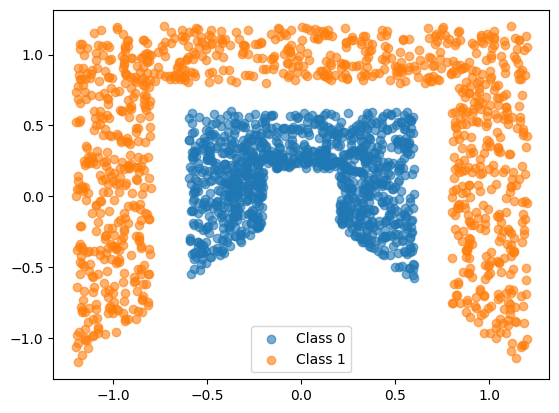

C:\Users\hridi\AppData\Local\Temp\ipykernel_6112\696620199.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'AUROC', 'AUPR'])


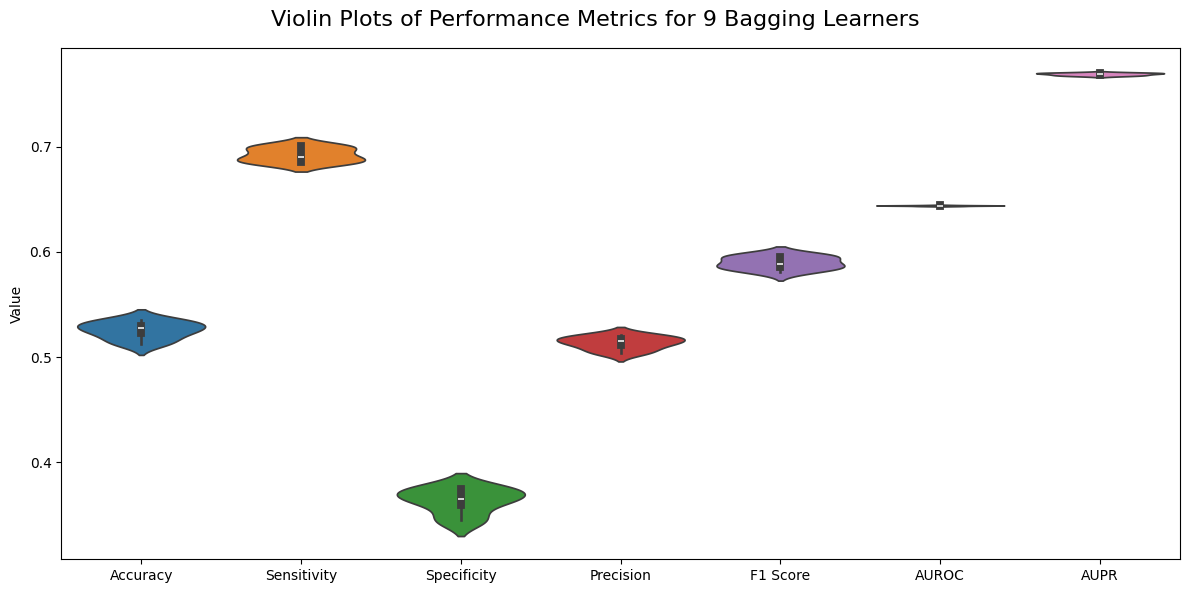

                            Performance for LR (avg ± stddev)                             
Accuracy       : 0.5256 ± 0.0076
Sensitivity    : 0.6926 ± 0.0064
Specificity    : 0.3634 ± 0.0111
Precision      : 0.5136 ± 0.0058
F1 Score       : 0.5898 ± 0.0057
AUROC          : 0.6442 ± 0.0003
AUPR           : 0.7693 ± 0.0011
                                 Performance on Test set                                  
                     Accuracy   Sensitivity  Specificity  Precision  F1-score   AUROC    AUPR    
Voting ensemble      0.5275      0.6853      0.3744      0.5153   0.5882   0.5298  0.5081
Stacking ensemble    0.7375      0.5330      0.9360      0.8898   0.6667   0.7345  0.7043


In [22]:
def main():
    # Load and preprocess the dataset
    # X_train, X_test, y_train, y_test = load_preprocess_dataset_tcc()
    # X_train, X_test, y_train, y_test = load_preprocess_dataset_adult()
    # X_train, X_test, y_train, y_test = load_preprocess_dataset_ccf()
    X_train, X_test, y_train, y_test = load_preprocess_dataset_online()

    # Split the training set into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Converting to dataframe
    X_train = pd.DataFrame(X_train)
    X_validation = pd.DataFrame(X_validation)
    y_train = pd.DataFrame(y_train)
    y_validation = pd.DataFrame(y_validation)

    # # Feature selection
    # top_features = feature_selection(X_train, y_train, 20)
    # X_train = X_train[top_features]
    # X_test = X_test[top_features]
    # X_validation = X_validation[top_features]

    # Performance Evaluation 
    performance_evaluation(X_train, y_train, X_validation, y_validation, X_test, y_test)


if __name__ == '__main__':
    main()